In [9]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely.wkt
import osmnx as ox

### 02-waze-historical

#### 1 Read Waze data

 - Waze csv stores `geo` column as strings instead of points, so need to use shapely to convert to shapely points [code from this thread](https://stackoverflow.com/questions/51855917/shapely-polygon-from-string)
 - Turn pandas dataframe into a GeoDataFrame

In [2]:
data = pd.read_csv('alerts_000000000000.csv')
geometry = data['geo'].map(lambda geo: shapely.wkt.loads(geo))
gdf = geopandas.GeoDataFrame(data, geometry=geometry)

#### 2 Filter data
 - Filter data for `'WEATHERHAZARD'` to ignore other road closures for different reasons. Assume that all weather hazards led to a road closure/road impassability
 - Alternatively, could filter for `type='ROAD_CLOSED'` and `subtype='WEATHERHAZARD'`, but no entries exist in this case

In [3]:
closures = gdf.loc[(data['type'] == 'WEATHERHAZARD')]
closures

,city,confidence,nThumbsUp,street,uuid,country,type,subtype,roadType,reliability,magvar,reportRating,ts,geo,geoWKT,geometry
15,NaN,0,0.0,NaN,fd6a7ee1-fd11-3d09-9986-16f5dcefffae,IN,WEATHERHAZARD,NaN,2.0,5,139,0,2020-03-14 02:45:58 UTC,POINT(77.805981 29.945757),Point(77.805981 29.945757),POINT (77.80598 29.94576)
20,Yamuna Nagar,0,0.0,NaN,e1ba4312-401a-3d5d-b966-40cdf7bfbc53,IN,WEATHERHAZARD,NaN,1.0,5,21,0,2020-02-02 07:22:54 UTC,POINT(77.282718 30.132441),Point(77.282718 30.132441),POINT (77.28272 30.13244)
35,Jhankat,0,NaN,NaN,6e71ccbc-616b-4f80-9f66-d62ebd087ed8,IN,WEATHERHAZARD,NaN,1.0,5,125,0,2021-02-02 04:42:15 UTC,POINT(79.886922 28.691291),Point(79.886922 28.691291),POINT (79.88692 28.69129)
39,NaN,0,0.0,NaN,c9b0efd3-8170-31d1-aa5a-2bcdc11a3ae2,IN,WEATHERHAZARD,NaN,1.0,5,325,0,2020-04-06 04:16:10 UTC,POINT(78.395798 30.344696),Point(78.395798 30.344696),POINT (78.39580 30.34470)
56,NaN,0,NaN,NaN,c425516d-d4dd-4bd8-8488-8f4de38a60e9,NaN,WEATHERHAZARD,NaN,1.0,5,0,0,2020-10-11 16:10:42 UTC,POINT(78.076533 30.876028),Point(78.076533 30.876028),POINT (78.07653 30.87603)
81,Haldwani,0,0.0,NaN,dd407cdc-885b-3550-ab84-d5675caaa0ab,IN,WEATHERHAZARD,NaN,1.0,5,117,0,2020-01-14 16:37:05 UTC,POINT(79.50381 29.224183),Point(79.50381 29.224183),POINT (79.50381 29.22418)
91,Dehradun,0,NaN,NaN,24937233-c9e3-4324-8bae-b44607339c1f,IN,WEATHERHAZARD,NaN,1.0,5,181,0,2021-06-10 17:10:27 UTC,POINT(78.025246 30.276462),Point(78.025246 30.276462),POINT (78.02525 30.27646)
107,NaN,0,0.0,NH-7,8fcdac58-1a16-3e82-b394-85f97fd13be0,IN,WEATHERHAZARD,NaN,6.0,5,81,2,2020-01-15 06:17:17 UTC,POINT(78.383441 30.122894),Point(78.383441 30.122894),POINT (78.38344 30.12289)
110,NaN,0,0.0,NH-7,108d9e1d-58b7-3e1a-b055-8205f8697baf,IN,WEATHERHAZARD,NaN,6.0,6,163,2,2020-01-15 06:33:20 UTC,POINT(78.389449 30.137082),Point(78.389449 30.137082),POINT (78.38945 30.13708)
146,NaN,0,NaN,MDR-49W,c36ca5bf-101d-4f65-ae6d-3dfe33e4de0d,IN,WEATHERHAZARD,NaN,2.0,5,359,0,2020-10-22 06:04:54 UTC,POINT(79.059965 29.032303),Point(79.059965 29.032303),POINT (79.05997 29.03230)


In [4]:
len(closures)

38

 - Save geopandas as a shapefile, to put in QGIS

In [5]:
closures.to_file("weatherclosures.shp")

#### Plotting (optional)

 - Plot all alert data on India basemap to visualize, with help from [this article](https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3).

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

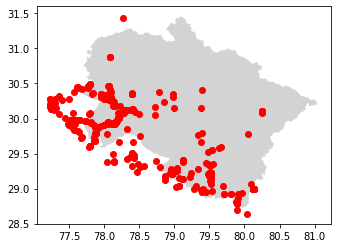

ValueError: cannot convert float NaN to integer

In [15]:
place_name = 'Uttarakhand, India'
place = ox.geocode_to_gdf(place_name)
place_roi = place.iloc[0,0]
ax1 = place.plot(color='lightgrey')

fig, ax = plt.subplots(figsize=(8,6))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world[world["name"] == "Uttarakhand"].plot(color='lightgrey', ax=ax)
gdf.plot(ax=ax1, color='red')


In [13]:
df = closures
# add new column to df
df['withinQ'] = ""

withinQlist = []
for lon,lat in zip(df.Longitude, df.Latitude):
    pt = Point(lon, lat)
    withinQ = pt.within(place['geometry'].values[0])
    #print( withinQ )
    withinQlist.append(withinQ)

# update values in the that column, values: True/False
df['withinQ'] = withinQlist

# select points within ecuador, assign to `result_df` dataframe
result_df = df[df.withinQ==True]
# select points outside ecuador, assign to `xresult_df` dataframe
xresult_df = df[df.withinQ==False]

# for checking/visualization, create a plot of relevant geometries
ax1 = place.plot(color='pink')
ax1.scatter(result_df.Longitude, result_df.Latitude, s=50, color='green')
#ax1.scatter(xresult_df.Longitude, xresult_df.Latitude, s=30, color='red')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


AttributeError: 'GeoDataFrame' object has no attribute 'Longitude'

 - Plot just weather closures, without India basemap

<AxesSubplot:>

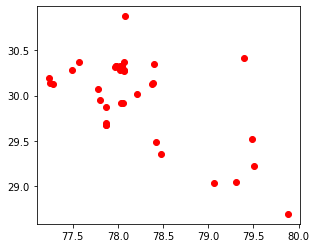

In [7]:
closures.plot(color='red')